In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
df = pd.read_csv("scores.csv")

In [19]:
df.head()

,Python,Sql,ML,Tableau,Excel,Student Placed
0,0.80,0.57,0.63,0.50,0.34,Yes
1,0.81,0.90,0.62,0.71,0.92,No
2,0.49,0.69,0.62,0.64,0.41,No
3,0.40,0.94,0.60,0.26,0.47,No
4,0.31,0.87,1.00,0.23,0.99,No


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Python          200 non-null    float64
 1   Sql             200 non-null    float64
 2   ML              200 non-null    float64
 3   Tableau         200 non-null    float64
 4   Excel           200 non-null    float64
 5   Student Placed  200 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.5+ KB


In [21]:
df.describe()

,Python,Sql,ML,Tableau,Excel
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.514100,0.495850,0.514350,0.495150,0.474950
std,0.305749,0.290694,0.285211,0.292463,0.281686
min,0.000000,0.010000,0.000000,0.010000,0.000000
25%,0.237500,0.227500,0.267500,0.240000,0.227500
50%,0.545000,0.490000,0.540000,0.500000,0.485000
75%,0.800000,0.740000,0.770000,0.740000,0.702500
max,1.000000,1.000000,1.000000,1.000000,0.990000


#### NOTE COLUMN:  
Python:
This column contains the percentage of the python's subject score.

Sql:
This column contains the percentage of the SQL subject score.


ML:
This column contains the percentage of the ML subject score.


Tableau:
This column contains the percentage of the Tableau subject score.


Excel:
This column contains the percentage of the Excel subject score.


Student Placed:
This column shows whether the student is placed with these total marks or not.

In [25]:
df["Student Placed"] = df["Student Placed"].map({"Yes":1, "No":0})

#### Simple EDA

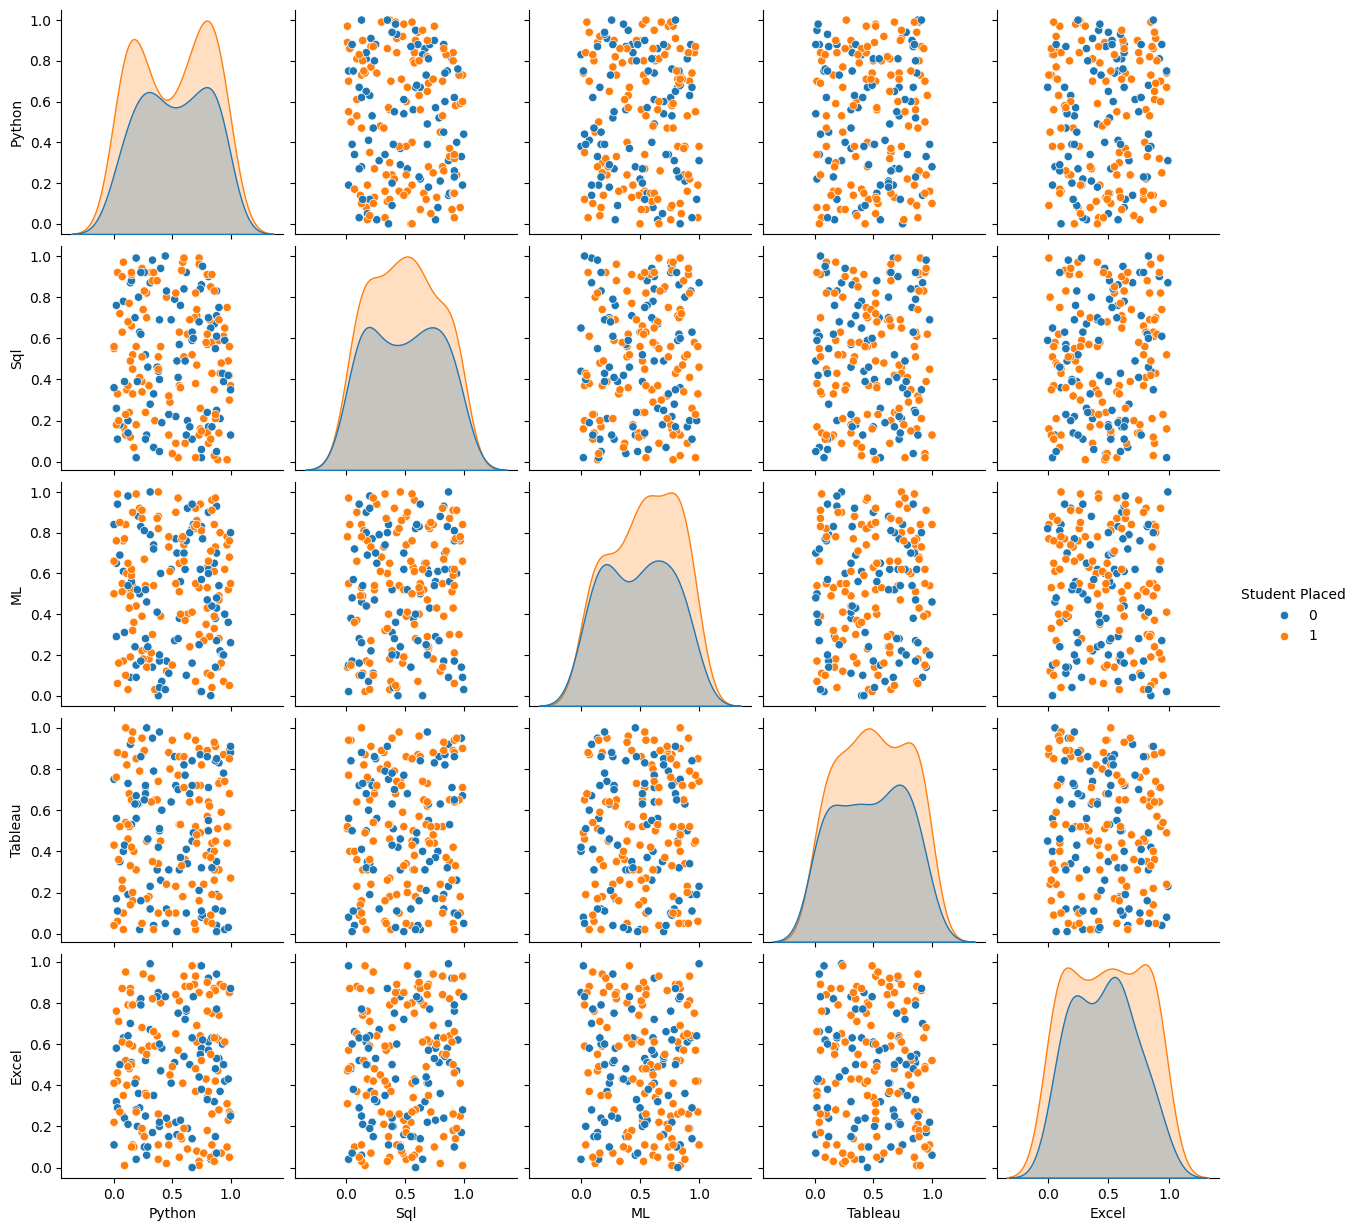

In [28]:
sns.pairplot(data=df,hue='Student Placed')
plt.show()

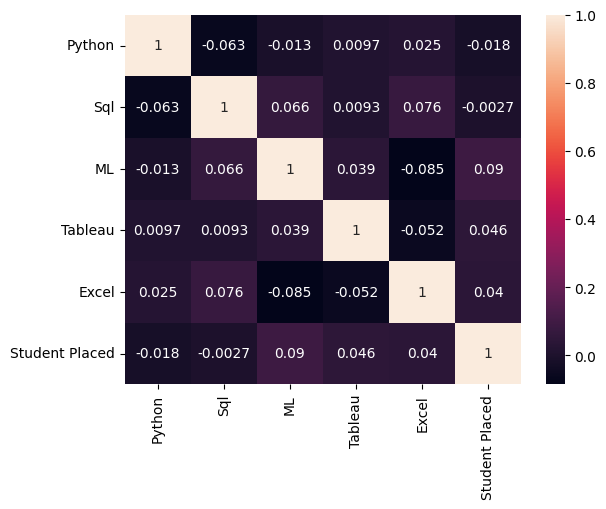

In [29]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
df.isnull().sum()

Python            0
Sql               0
ML                0
Tableau           0
Excel             0
Student Placed    0
dtype: int64

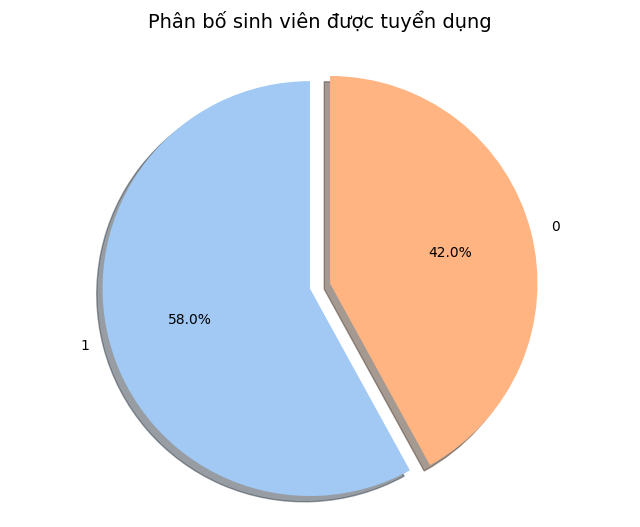

In [37]:
def plot_pie_chart(df, column_name, title="Phân bố dữ liệu", colors_palette='pastel', explode_factor=0.1):
    """
    Vẽ biểu đồ tròn cho một cột trong DataFrame.
    
    Parameters:
    - df: DataFrame chứa dữ liệu
    - column_name: Tên cột muốn vẽ biểu đồ tròn
    - title: Tiêu đề của biểu đồ
    - colors_palette: Tên bảng màu từ seaborn (mặc định: 'pastel')
    - explode_factor: Độ tách của phần lớn nhất (mặc định: 0.1)
    """
    # 1. Đếm số lượng giá trị trong cột
    value_counts = df[column_name].value_counts()

    # 2. Tùy chỉnh nhãn, màu sắc và explode
    labels = value_counts.index  # Nhãn là các giá trị duy nhất trong cột
    colors = sns.color_palette(colors_palette)[:len(labels)]  # Chọn màu từ bảng màu
    explode = [explode_factor if i == value_counts.argmax() else 0 for i in range(len(labels))]  # Tách phần lớn nhất

    # 3. Vẽ biểu đồ tròn
    plt.figure(figsize=(8, 6))  # Kích thước biểu đồ
    plt.pie(value_counts, labels=labels, colors=colors, explode=explode, 
            autopct='%1.1f%%', startangle=90, shadow=True)

    # 4. Thêm tiêu đề
    plt.title(title, fontsize=14, pad=20)

    # 5. Đảm bảo biểu đồ tròn là hình tròn
    plt.axis('equal')

    # 6. Hiển thị biểu đồ
    plt.show()

plot_pie_chart(df, 'Student Placed', 'Phân bố sinh viên được tuyển dụng')

#### Train model

In [40]:
X = df.drop('Student Placed', axis=1)
y = df['Student Placed']

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')

In [43]:
print("Độ chính xác của từng fold:", cv_scores)
print("Độ chính xác trung bình:", cv_scores.mean())
print("Độ lệch chuẩn:", cv_scores.std())

Độ chính xác của từng fold: [0.525 0.375 0.475 0.4   0.4  ]
Độ chính xác trung bình: 0.43499999999999994
Độ lệch chuẩn: 0.05612486080160912


-> Độ chính xác khá thấp

In [47]:
# Tìm K tốt nhất
k_values = range(1, 21)
cv_scores_mean = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
    cv_scores_mean.append(scores.mean())

best_k = k_values[np.argmax(cv_scores_mean)]
print(f"Giá trị k tốt nhất: {best_k} với độ chính xác trung bình: {max(cv_scores_mean)}")

Giá trị k tốt nhất: 17 với độ chính xác trung bình: 0.515


In [49]:
# 6. Huấn luyện mô hình cuối cùng với k tốt nhất và dự đoán
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Huấn luyện mô hình với k tốt nhất
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
from sklearn.metrics import accuracy_score
# Dự đoán và đánh giá trên tập kiểm tra
y_pred = final_knn.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác trên tập kiểm tra với k={best_k}: {final_accuracy}")

Độ chính xác trên tập kiểm tra với k=17: 0.6


-> Mô hình chưa đủ tốt, có thể dùng mô hình khác hoặc là sử dụng cách tính khoảng cách khác